<a href="https://colab.research.google.com/github/Shiviksha/Insurance-Cost-Prediction/blob/main/Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#to check for missing values
df.isnull().sum()

#no data cleaning required

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 600x600 with 0 Axes>

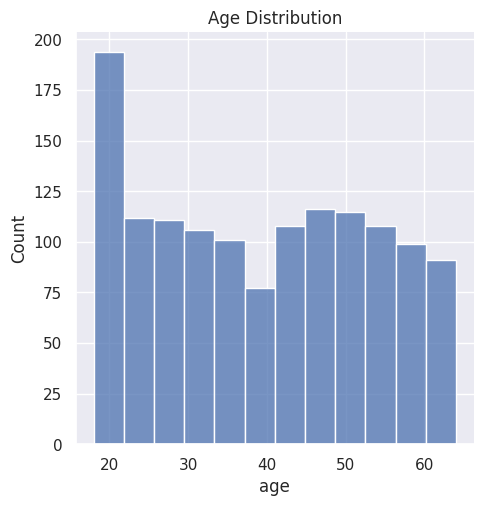

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

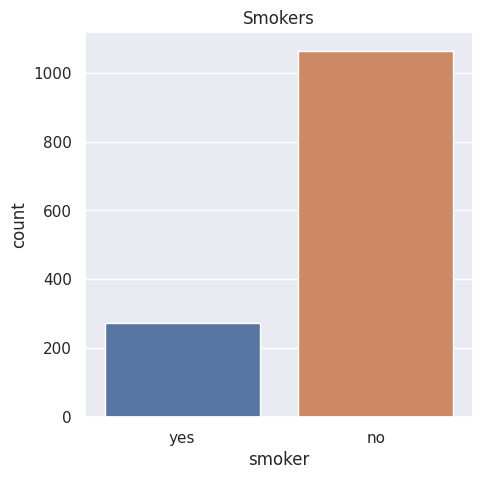

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('Smokers')
plt.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Figure size 600x600 with 0 Axes>

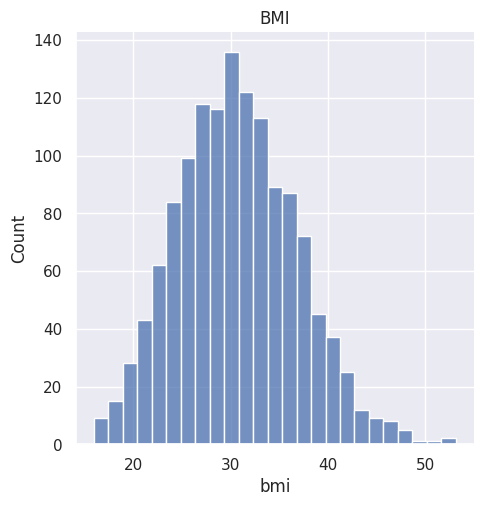

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI')
plt.show()

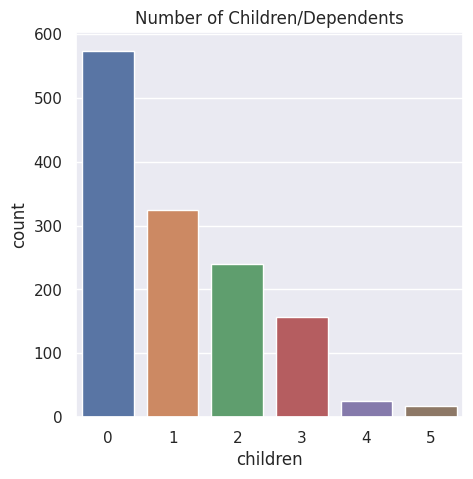

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=df)
plt.title('Number of Children/Dependents')
plt.show()


In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

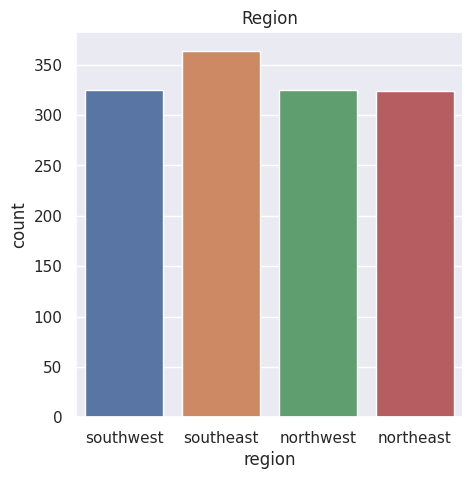

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

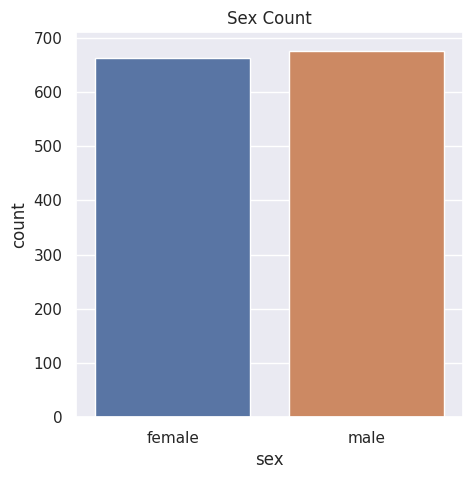

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.title('Sex Count')
plt.show()

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

encoding the categorical features (smoker,sex,region)

In [ ]:
#encoding the sex feature
df.replace({'sex':{'male':1, 'female':0}},inplace=True)

#encoding the smoker feature
df.replace({'smoker':{'yes':1, 'no':0}}, inplace= True)

#encoding the region
df.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace=True)

print (df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520


In [ ]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [ ]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
Y_train_pred=regressor.predict(X_train)

In [ ]:
rsq_train=metrics.r2_score(Y_train, Y_train_pred)
print(rsq_train)

0.7368306228430945


In [ ]:
regressor.fit(X_test,Y_test)
Y_test_pred=regressor.predict(X_test)


In [ ]:
rsq_test=metrics.r2_score(Y_test,Y_test_pred)
print(rsq_test)

0.8038226918232498


In [ ]:
coefficients= regressor.coef_
print(coefficients)

[  269.6742287   -703.18668473   352.37810024   614.53202772
 24953.23526901   645.37541867]


Analyzing the Predictive System

In [ ]:
#age=37, female, bmi=27.74, children=3, smoker=no, region=northwest
input_data=(37,0,27.74,2,0,2)

#changing data into numpy array
new=np.asarray(input_data)
input_data_reshaped=new.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)
print(prediction)

[7914.80599597]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
